# Chapter 5: Machine Learning - Linear Regression



## Supervised machine learning: Regression

As you remember, we talked about two types of supervised machine learning approaches:<br>
__Classification__: Predicting a class. For instance, to determine if a patient is sick, if an email is spam or predicting the color of a wine based on its reviews.<br>
__Regression__: Predicting a numerical value. It would be the case of the prices of a house when choosing different options or the demand of occupation of a hotel.<br>

We will work on the same data set further to build a regression model, in order to predict the score of a wine based on its reviews. In this regression task, the predictions we make will be numerical values between 80 and 100 (higher means a better wine!). While in classification, the classes do not have any relations to each other, in regression the numbers we predict are ordered! In other words, the different values we can predict have an ordinality relationship. 

Ordinality: A number indicating the position of something in a series or order.

We will use the same feature extraction techniques to build a regression model:
1. Extract features from raw data
2. Train a model using the features and the correct values (wine score) in the training set
3. Use the trained model to predict the actual values in the test set 

<img src="img/ml2.png" alt="Drawing" style="width: 700px;"/>

### Linear Regression

If you remember, we used the following equation for logistic regression:


\begin{align}
z = c_0+c_1*𝑥_1+c_2*𝑥_2+...+c_𝑛*𝑥_𝑛
\end{align}


In this equation we have n features (represented by x) and n coefficients (weights) per feature (represented by c). Finally, we have c0, which represents the intercept (or bias), which models the predicted value in the absence of any of the features (when the coefficients of each feature is 0, the only remaining value in this equation will be c0).

We also discussed that the value of z lies between -∞ and +∞. 
In logistic regression, we apply the sigmoid (or logistic function) to this value to obtain prob. values between 0 and 1 and he final probability scores let the model predict the label. 

In linear regression, as the values we predict are continuous, we don't need any modifications. We will let the model predict simply a value between  -∞ and +∞.

Let's try to build a simple linear regression model using 10 terms as features from a given review, to predict the score of the corresponding wine!

Let's start from scratch and open our training data:


In [1]:
import pandas

# Let's load the training data from a csv file
train_set = pandas.read_csv('./train_small_2.csv', sep='\t', encoding='utf-8')
test_set = pandas.read_csv('./test.csv', sep='\t', encoding='utf-8')
test_set

,File name,URL,Color,Misc1,Misc2,Brand,Year,Price v1,Price v2,Grape type v1,...,Alcohol,Region,Country,Misc4,Score v1,Score v2,Reviewer,Review,Review date,Misc5
0,agroargento-2004-timoleonte-red-sicilia.txt,http://buyingguide.winemag.com/catalog/agroarg...,Red,no,no,AgroArgento 2004 Timoleonte Red (Sicilia),2004,unk,unk,red_blend,...,13.5%,"Sicilia, Sicily & Sardinia",Italy,unk,90,90,M.L.,"Leather, spice, tobacco and tea emerge from th...",3/1/2009,unk
1,ceretto-2000-blange-italian-white-arneis-piedm...,http://buyingguide.winemag.com/catalog/ceretto...,White,no,no,Ceretto 2000 Blangé Arneis (Piedmont),2000,30,$30,arneis_italian_white,...,12%,Piedmont,Italy,Moët Hennessy USA,87,87,D.T.,"So pale that it’s almost colorless, the Blangé...",9/1/2001,unk
2,edna-valley-vineyard-1998-paragon-pinot-noir-c...,http://buyingguide.winemag.com/catalog/edna-va...,Red,no,no,Edna Valley Vineyard 1998 Paragon Pinot Noir (...,1998,19,$19,pinot_noir,...,14.2%,"Edna Valley, Central Coast, California",US,unk,86,86,S.H.,"Comes across on the earthy, herbal side, altho...",10/1/2000,unk
3,arnaldo-caprai-2011-grecante-italian-white-gre...,http://buyingguide.winemag.com/catalog/arnaldo...,White,no,no,Arnaldo Caprai 2011 Grecante Grechetto (Colli ...,2011,20,$20,grechetto_italian_white,...,13.5%,"Colli Martani, Central Italy",Italy,Folio Fine Wine Partners,88,88,M.L.,What a wonderful wine to pair with spaghetti a...,10/1/2012,unk
4,cline-2003-ancient-vines-mourvedre-central-coa...,http://buyingguide.winemag.com/catalog/cline-2...,Red,no,no,Cline 2003 Ancient Vines Mourvèdre (Contra Cos...,2003,18,$18,mourvèdre,...,unk,"Contra Costa County, Central Coast, California",US,unk,84,84,S.H.,"What’s puzzling about this wine is why, given ...",4/1/2005,unk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15277,materra-2010-sauvignon-blanc-napa-oak-knoll.txt,http://buyingguide.winemag.com/catalog/materra...,White,no,no,Materra 2010 Sauvignon Blanc (Oak Knoll),2010,18,$18,sauvignon_blanc,...,14.2%,"Oak Knoll, Napa, California",US,unk,85,85,S.H.,"Here’s a brisk, clean Sauvignon Blanc, packed ...",12/1/2011,unk
15278,hillinger-2004-other-red-zweigelt-burgenland.txt,http://buyingguide.winemag.com/catalog/hilling...,Red,no,no,Hillinger 2004 Zweigelt (Burgenland),2004,18,$18,zweigelt_other_red,...,13%,Burgenland,Austria,Prescott Wines,90,90,Joe Czerwinski,"A plump, juicy rendition of Zweigelt, with whi...",8/1/2006,unk
15279,bighorn-2003-sugerloaf-mountain-vineyard-shira...,http://buyingguide.winemag.com/catalog/bighorn...,Red,no,no,Bighorn 2003 Sugerloaf Mountain Vineyard Syrah...,2003,30,$30,syrah,...,unk,"Napa Valley, Napa, California",US,unk,90,90,S.H.,"This rich, full-bodied Syrah aspires to a Nort...",12/15/2005,unk
15280,kumeu-river-2007-village-chardonnay-kumeu.txt,http://buyingguide.winemag.com/catalog/kumeu-r...,White,no,no,Kumeu River 2007 Village Chardonnay (Kumeu),2007,19,$19,chardonnay,...,13%,Kumeu,New Zealand,Wilson Daniels Ltd,86,86,Joe Czerwinski,The entry-level Chardonnay from Kumeu River gi...,9/1/2009,unk


While in logistic regression our labels were the different colors of wine, in this regression task we will be predicting the score (which is stored in the column labelled as "Score v1")
So let's get an overview of these two columns:

In [2]:
# To build a machine learning model, we are only interested in the "Review" and "Color" information for now
train_set_scores = train_set[['Review','Score v1']]
train_set_scores

,Review,Score v1
0,Raspberry and cherry aromas mix with more matu...,82
1,"This Navarran Garnacha is more interesting, of...",86
2,A fine complement to the Forgeron Late Harvest...,90
3,"Complex aromas of cassis, dough, espresso, bac...",96
4,"Crisp and on the sweet side, this PG has flavo...",85
...,...,...
9995,"Opening with fruity, bubble gum scents, this b...",92
9996,"Soft, dry and simple, with modest peach, pinea...",85
9997,"Age has been kind to this Petite, one of Conca...",87
9998,Isenhower changes the vineyard sources for thi...,92


We will store these two columns in two separate lists:

In [3]:
# Let's extract only these two columns from the data 
train_reviews = train_set['Review'].to_list()
train_scores = train_set['Score v1'].to_list()


test_reviews = test_set['Review'].to_list()
test_scores = test_set['Score v1'].to_list()

# Print the first 5 review and the corresponding scores to have an idea
for r, s in list(zip(train_reviews, train_scores))[:5]:
    print(r, s)


Raspberry and cherry aromas mix with more mature notes of fall leaves and lead into some earthy complexity on the somewhat thin palate. Velvety tannins and moderate acidity make for easy drinking. Notes of woods and mushroom on the finish suggest that this wine will not have much going forit by the end of 2009. 82
This Navarran Garnacha is more interesting, offering lemony, floral aromas that are red in nature and not very stout. The palate sizzles with racy acidity, while the flavor profile is pure and tangy, with cranberry and red plum notes. A zesty style of Grenache. 86
A fine complement to the Forgeron Late Harvest Sémillon, this is equally sweet (9.5%) but fortified to just under 18% alcohol. It’s reminiscent of Benedictine & Brandy – orange liqueur with some alcohol power. Nice focus and balance. 90
Complex aromas of cassis, dough, espresso, bacon, and cola create instant interest. It seduces with its rich dark fruit and earth flavors, and a concentrated, suave mouthfeel. Big fl

Let's first have an idea about the scores assigned to reviews. What are the min. and max. scores? What is the average of the scores?

In [4]:
from statistics import mean, median

print("Min:" + str(min(train_scores)))
print("Max:" + str(max(train_scores)))
print("Average:" + str(mean(train_scores)))
print("Median:" + str(median(train_scores)))

Min:80
Max:100
Average:87.6512
Median:87.0


87.08995956873315
87.92202283849919
85.5945945945946
88.33088235294117


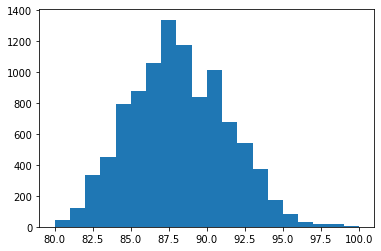

In [5]:
import matplotlib.pyplot as plt
plt.hist(train_scores, bins=20)
plt.show()

### DIY
Define a function "color_stats" that takes two inputs: color (string), train_set (pandas csv), which:
- prints the mean score for a given color (Red, White, Rose, unk)
- plots the histogram of the scores for the same color


In [6]:
df_filtered = train_set[train_set['Color'] == "Red"]
print(df_filtered)

                                              File name  \
0           red-bicyclette-2005-merlot-vin-pays-doc.txt   
1     bodegas-artazu-2008-santa-cruz-grenache-garnac...   
3     lewis-1997-reserve-cabernet-sauvignon-napa-val...   
5             cantina-pino-2009-nebbiolo-barbaresco.txt   
8     righteous-2008-red-columbia-valley-walla-walla...   
...                                                 ...   
9988  testarossa-2004-garys-vineyard-pinot-noir-cent...   
9994  sheldrake-point-2006-barrel-reserve-merlot-fin...   
9997  concannon-2007-heritage-petite-sirah-central-c...   
9998  isenhower-cellars-2004-river-beauty-shiraz-syr...   
9999  canoe-ridge-2011-reserve-merlot-columbia-valle...   

                                                    URL Color Misc1 Misc2  \
0     http://buyingguide.winemag.com/catalog/red-bic...   Red    no    no   
1     http://buyingguide.winemag.com/catalog/bodegas...   Red    no    no   
3     http://buyingguide.winemag.com/catalog/lewis-1...   Re

In [18]:
import matplotlib.pyplot as plt


def color_stats(color, train_set):
    color_scores = []
    train_colors = train_set['Color'].to_list()
    train_scores = train_set['Score v1'].to_list()
    for s, c in zip(train_scores, train_colors):
        if c == color:
            color_scores.append(s)
    print(mean(color_scores))
    plt.hist(color_scores, bins=20)
    plt.show()


87.92202283849919


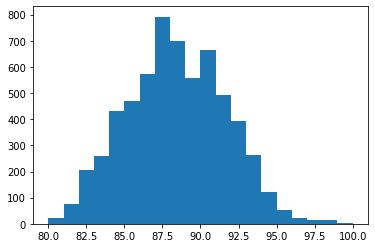

87.08995956873315


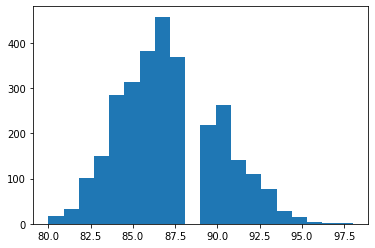

In [19]:
color_stats("Red", train_set)
color_stats("White", train_set)

In [17]:


import matplotlib.pyplot as plt


def color_stats(color, train_set):
    color_scores = []
    train_colors = train_set['Color'].to_list()
    train_scores = train_set['Score v1'].to_list()
    for s, c in zip(train_scores, train_colors):
        if c == color:
            color_scores.append(s)
    print(mean(color_scores))
    plt.hist(color_scores, bins=20)
    plt.show()

white_scores = []
red_scores = []
unk_scores = []
rose_scores = []
for s, c in zip(train_scores, train_colors):
    if c == "Red":
        red_scores.append(s)
    elif c == "White":
        white_scores.append(s)
    elif c == "Rose":
        rose_scores.append(s)
    elif c == "unk":
        unk_scores.append(s)

print(mean(white_scores))
print(mean(red_scores))
print(mean(rose_scores))
print(mean(unk_scores))

plt.hist(red_scores, bins=20)
plt.show()
plt.hist(white_scores, bins=20)
plt.show()
plt.hist(rose_scores, bins=20)
plt.show()
plt.hist(unk_scores, bins=20)
plt.show()

NameError: ignored

In [20]:
#TD INSERTED, as previous cell did not run


import matplotlib.pyplot as plt


def color_stats(color, train_set):
    color_scores = []
    train_colors = train_set['Color'].to_list()
    train_scores = train_set['Score v1'].to_list()
    for s, c in zip(train_scores, train_colors):
        if c == color:
            color_scores.append(s)
    print(mean(color_scores))
    plt.hist(color_scores, bins=20)
    plt.show()

    white_scores = []
    red_scores = []
    unk_scores = []
    rose_scores = []
    for s, c in zip(train_scores, train_colors):
        if c == "Red":
            red_scores.append(s)
        elif c == "White":
            white_scores.append(s)
        elif c == "Rose":
            rose_scores.append(s)
        elif c == "unk":
            unk_scores.append(s)

    print(mean(white_scores))
    print(mean(red_scores))
    print(mean(rose_scores))
    print(mean(unk_scores))

    plt.hist(red_scores, bins=20)
    plt.show()
    plt.hist(white_scores, bins=20)
    plt.show()
    plt.hist(rose_scores, bins=20)
    plt.show()
    plt.hist(unk_scores, bins=20)
    plt.show()

87.92202283849919


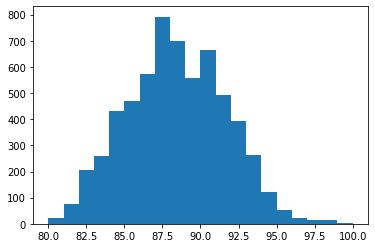

87.08995956873315
87.92202283849919
85.5945945945946
88.33088235294117


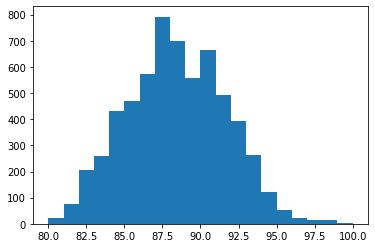

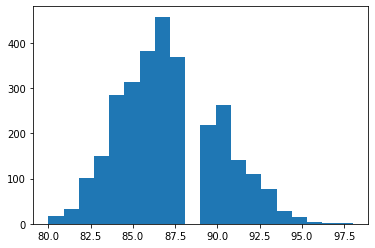

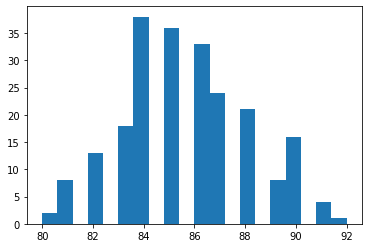

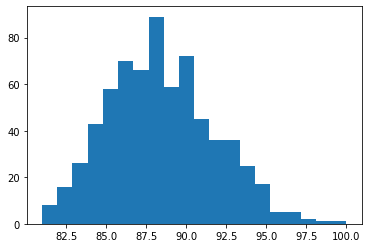

87.08995956873315


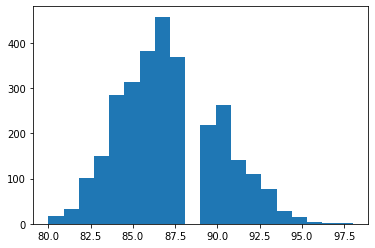

87.08995956873315
87.92202283849919
85.5945945945946
88.33088235294117


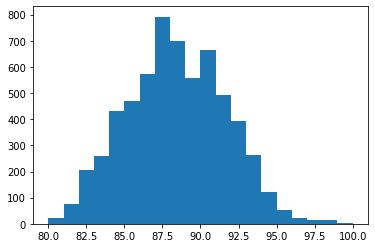

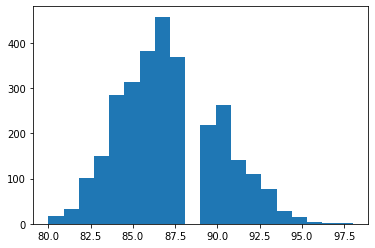

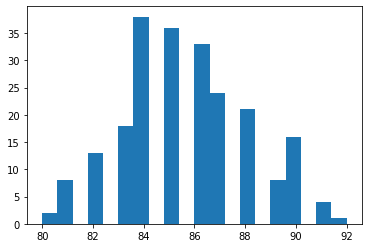

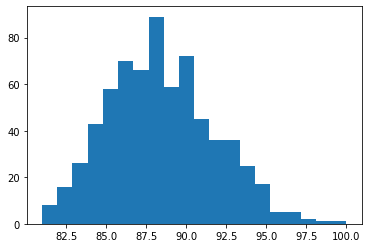

In [21]:
color_stats("Red", train_set)
color_stats("White", train_set)

Now it's time to find useful features in this data set that can help us to predict wine color. Similar to the classification task we worked on last week, we will start with a limited list of 10 features (10 terms in this example). We will then represent each review with the 10 words and indicate if the words in our list exist in a given review or not. We can do this by first creating a zero vector of length 10 and change the value of each feature to 1 if the corresponding word exists in the given review.

Last week, we started with some terms we picked from the following list:

<img src="img/terms.png" alt="Drawing" style="width: 300px;"/> 

Some of these adjectives were highly informative on predicting the color, such as "tannin" or "berry", which were assigned high positive weights (coefficients by our model) for the label "Red".

What do you think some good features might be for predicting the score of the wine?
Do you think "tannin" and "berry" will still be good features?

Probably not! (but please test it yourself if you are curious)
While these terms are good indicators of the color, they might not necessarily indicate the quality (or the score) of a given wine.

Print some of the reviews (not necessarily the first 10) and their corresponding scores and try to come up with 10 terms that you think might be good indicators of the wine score.

I will use the following list of terms (features for the remainder of this course but please use your own list to compare the results)"

In [23]:
for r, s in list(zip(train_reviews, train_scores))[:10]:
    print(r)
    print(s)
    print()

Raspberry and cherry aromas mix with more mature notes of fall leaves and lead into some earthy complexity on the somewhat thin palate. Velvety tannins and moderate acidity make for easy drinking. Notes of woods and mushroom on the finish suggest that this wine will not have much going forit by the end of 2009.
82

This Navarran Garnacha is more interesting, offering lemony, floral aromas that are red in nature and not very stout. The palate sizzles with racy acidity, while the flavor profile is pure and tangy, with cranberry and red plum notes. A zesty style of Grenache.
86

A fine complement to the Forgeron Late Harvest Sémillon, this is equally sweet (9.5%) but fortified to just under 18% alcohol. It’s reminiscent of Benedictine & Brandy – orange liqueur with some alcohol power. Nice focus and balance.
90

Complex aromas of cassis, dough, espresso, bacon, and cola create instant interest. It seduces with its rich dark fruit and earth flavors, and a concentrated, suave mouthfeel. Big

In [24]:
# Try to guess which terms might be good indicators of the wine score 
# you can compare your guesses to the coefficients of each term when we build the model
# Please use lemmas in your term list as we will be matching these terms with the lemmas of the words in each review
terms_score = ["balance", "fine", "nice", "poor", "not", "rich", "personality", "quality", "blend", "tannin"]


In [26]:
import numpy 
# Let's create zero vectors of length 10 for each review in our training set
# numpy.zeros(X, Y) let's us do this easily
# X = no. of columns, Y = no. of rows
train_features = numpy.zeros((len(train_reviews), len(terms_score)))
print(train_features.shape)

test_features = numpy.zeros((len(test_reviews), len(terms_score)))
print(test_features.shape)

(10000, 10)
(15282, 10)


We will define the following function to generate feature vectors (for both training and test sets) as we did similarly for the classification task:

In [30]:
def generate_feature_vectors(reviews, features, terms_score):
    # For each review and empty feature vector
    for review, vector in zip(reviews, features):
        # We first get the list of lemmas from the review
        tokens_list = [token.lemma_ for token in review]
        # loop over the terms we have in our term list
        for term in terms_score:
            # If we find any of our terms in this review (in the list of lemmas)
            if term in tokens_list:
                # We get the term id from the terms_score list
                term_id = terms_score.index(term)
                # and by using this id, we modify the empty feature vector
                # and change the 0 value to 1, for the corresponding term id
                vector[term_id] = 1
    
    # this function does not return anything as it modifies "features" in place.

Now we will process the reviews of the training set and the test set with "nlp" so that we have access to the tokens and their lemmas.

In [31]:
import spacy

nlp = spacy.load('en_core_web_sm')

# Process train and test sets with nlp
train_doc_reviews = nlp.pipe(train_reviews)
test_doc_reviews = nlp.pipe(test_reviews)


And we will generate the features for both the training and the test sets.
As this step might some time, I will also print a message when the tasks are completed.

In [29]:
generate_feature_vectors(train_doc_reviews, train_features, terms_score)
print("training features generated")
generate_feature_vectors(test_doc_reviews, test_features, terms_score)
print("test features generated")

# Print also the size of the feature matrices for both the training and the test sets
print(train_features.shape)
print(test_features.shape)

training features generated
test features generated
(10000, 10)
(15282, 10)


We can train our regression model now:


In [33]:
#In sklearn, all machine learning models are implemented as Python classes
# We import LinearRegression this time!
from sklearn.linear_model import LinearRegression

# Make an instance of the Model from LogisticRegression class
# all parameters not specified are set to their defaults
linreg_10 = LinearRegression()

# Train the model on the data, storing the information learned from the data
# Model is learning the relationship between digits (x_train) and labels (y_train)
linreg_10.fit(train_features, train_scores)


# We can get additional information about all the parameters used with LogReg model
print(linreg_10.get_params())
print(linreg_10)


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
LinearRegression()


Let's save our model!

In [34]:
import pickle


# Save to file in the current working directory
pkl_filename = "linreg_10.pkl"
with open("linreg_10.pkl", 'wb') as file:
    pickle.dump(linreg_10, file)

# Load from file to check if everything is ok
with open("linreg_10.pkl", 'rb') as file:
    pickle_model = pickle.load(file)

pickle_model

LinearRegression()

Before we make predictions, we will first define a function that takes an index value (the index for the review list) and prints all the relavant information for us:

In [41]:
def predict_linr(index):
    print("Review:")
    print(test_reviews[index])
    print("Features for this review:")
    print(test_features[index])
    print("Our terms (features)")
    print(terms_score)
    print("Actual score:")
    print(test_scores[index])

    print()
    print("Prediction:")
    print(linreg_10.predict([test_features[index]]))
    print()


Now we can predict a score for a given review (index):

In [42]:
predict_linr(0)
predict_linr(10)

Review:
Leather, spice, tobacco and tea emerge from the nose of this Sicilian blend of Nero d’Avola, Syrah, Merlot, Cabernet and Petit Verdot. You’ll get aromas of clove, allspice and vanilla behind vibrant blueberry and raspberry.
Features for this review:
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Our terms (features)
['balance', 'fine', 'nice', 'poor', 'not', 'rich', 'personality', 'quality', 'blend', 'tannin']
Actual score:
90

Prediction:
[87.4632334]

Review:
I haven’t been a fan of Santa Ynez Cabs for the simple reason that they’re so seldom ripe. You get this green, herb and mint streak that’s not flattering to Cab’s tannins. This wine is in that vein. 
Features for this review:
[0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
Our terms (features)
['balance', 'fine', 'nice', 'poor', 'not', 'rich', 'personality', 'quality', 'blend', 'tannin']
Actual score:
82

Prediction:
[87.28767373]



Like in logistic regression, in linear regression we can see the coefficients assigned to each feature in the trained model and the intercept (or the bias value).
We will loop over each term (feature) and the corresponding feature together with the zip function and display the value of each coefficient.

Unlike logistic regression, we have only a single set of coefficients as we have only one type of value to predict. Remember that in logistic regression, we had coefficients for each label!


In [44]:
for term, coef in zip(terms_score, linreg_10.coef_):
    print(term, coef)

print()
print("The intercept (bias):")
print(linreg_10.intercept_)
#How can we interpret the coefficients?

balance 1.1139631669651768
fine 1.3589326587729076
nice -0.40557249781829846
poor -1.5816685764013465
not -0.7250814320813274
rich 2.0171048137313194
personality 0.28247591678932943
quality 0.3378025277223333
blend 0.3949532167062495
tannin 0.9444749720175375

The intercept (bias):
87.06828018648761


The intercept of 87.05 tells us that when no features are present in a given review, the prediction will be 87.05. The intercept is also very close to the average scores (87.65).
It is easier to think about coefficients as additional values on top of the intercept.<br>
<br>
The term "rich" seems to be the highest positive value: 2.00. It means that when this term appears in our review, the prediction will increase by 2 points. <br>
If this is the only feature present in a given review, the prediction will be 87.05 + 2 = 89.05.<br>
In other words, the term "rich" has a large positive impact on the predicted score. <br>
<br>
On the other hand, the term "poor" has the largest negative value, which makes sense as it can be an indicator of bad quality: -1.56.<br>
Similarly, if this term appears in a given review, the prediction value will decreased by 1.56 points.<br>
If both "rich" and "poor" appear in a given review, the prediction score will be updated by both coefficients and will be 87.05 + 2 - 1.56 = 87.49
<br><br>
What about the term "nice"?
While this is usually a positive term, remember that the scores are only given to exceptionally good wines in this data set. That's why the scores range between 80 and 100. So while "nice" in general might indicate positive qualities, in these reviews, it might be used to mean that the wine is "not bad" but "not necessarily very good either".



### DIY1. Feature weights ##
Can you print the 5 terms with the largest positive coefficient values __together__ with the values themselves?
- Make a list of coefficient/term pairs
- Use "sorted" (how  to sort values in descending order?)

In [50]:
coef_list = []
for t, c in zip(terms_score, linreg_10.coef_):
    coef_list.append([c, t])

coefs_sorted = sorted(coef_list, reverse=True)
print(coefs_sorted[:5])


print()
coef_list = []
for t, c in zip(terms_score, linreg_10.coef_):
    coef_list.append([t, c])

coefs_sorted = sorted(coef_list,key=lambda x:x[1], reverse=True)
print(coefs_sorted[:5])

[[2.0171048137313194, 'rich'], [1.3589326587729076, 'fine'], [1.1139631669651768, 'balance'], [0.9444749720175375, 'tannin'], [0.3949532167062495, 'blend']]

[['rich', 2.0171048137313194], ['fine', 1.3589326587729076], ['balance', 1.1139631669651768], ['tannin', 0.9444749720175375], ['blend', 0.3949532167062495]]


### DIY2. Calculating predictions manually
#### CELL 1:
Define a function (calculate_prediction) that calculates the prediction score using the coefficients from the model "linreg_10", when given a __list of terms as input__.

#### CELL 2:
- Calculate the score of a review if the following terms are present: "blend"
- Calculate the socre of a review if the following terms are present: "not", "tannin"

In [48]:
def calculate_prediction(list_terms):
    final_score = linreg_10.intercept_
    for item in terms_score:
        if item in list_terms:
            item_id = terms_score.index(item)
            final_score += linreg_10.coef_[item_id]

    print(final_score)

In [52]:
test1 = ["blend"]
test2 = ["not", "tannin"]
calculate_prediction(test1)
calculate_prediction(test2)

87.46323340319387
87.28767372642382


## Evaluating regressors
To evaluate the performance of our linear regression models, we will not be using accuracy, precision, recall or f1-scores, as these metrics are used to measure classification performance.

Instead, we will measure the error made for each prediction by substracting the actual value from the prediction in each case.
Let's look at some examples to see how we do this.

In the following review review:
So pale that it’s almost colorless, the Blangé—made from Arneis grapes in Piedmont—has the oak-meets-citrus nose you’d expect of a Chardonnay. The lemon, grapefruit and pear flavors, coupled with a superspritzy, Asti-like mouthfeel, make this a good Sunday brunch eye-opener. Its slightly high acidity could cut through any French toast or waffle that you throw its way. Finishes medium-long, with herbal notes. 

none of our terms (features) have been found. It means that our feature vecrtor looks like this:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

When no features are found, the intercept value will determine the final prediction, which is 87.05, in this case.
For this review, the actual score was 87, so the error of our prediction is 87 - 87.05 = -0.05. In other words, our prediction was 0.05 higher than the actual value. In order to look at the amount of error  we will always take the absolute value of the error as we are not interested in the direction of the error (if it is lower than the actual value or higher). In this case the absolute error will be 0.05.

In the second example, in the given review, we find two of our terms (features), "not" and "tannin":
I haven’t been a fan of Santa Ynez Cabs for the simple reason that they’re so seldom ripe. You get this green, herb and mint streak that’s not flattering to Cab’s tannins. This wine is in that vein. 

So our feature vector looks like this:
[0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]

by multiplying 1 with the corresponding coefficients of these two vectors and adding them to the intercept, our prediction becomes 87.26. For this review, the actual score was 82. So the absolute error our model made on this review is abs(82 - 87.26) = 5.26.

The linear regression model creates a linear prediction pattern. To be able to measure the overall performance of our model, we need to calculate all errors for all predictions. In other words, we measure the distance between each actual value and our linear pattern (these are the errors that our model makes, which are highlighted with red lines in the following illustration):

 <img src="img/mae.jpg" alt="Drawing" style="width: 500px;"/>

Once we measure the error for each prediction, we will take the average of these errors. This is called as __mean absolute error (or MAE)__.

Let's see how we can measure MAE using sklearn.



To be able to measure MAE, we need the predictions on the whole test set (so far we have been predicting couple of instances).


In [ ]:
test_predictions = linreg_10.predict(test_features)

# Let's also print the first 10 predictions and the actual values
print(test_predictions[:10])
print(test_scores[:10])

[87.46821765 87.05740688 87.05740688 87.05740688 86.32658247 90.40824762
 88.53423949 90.19432825 86.32658247 87.05740688]
[90, 87, 86, 88, 84, 90, 90, 89, 80, 91]


### DIY3: Calculate error
Can you calculate the error made for each of these first 10 predictions?
#### CELL 1:
- For each prediction, print (1) prediction score, (2) correct score, (3) absolute error
- How can we get the absolute value of a given error?

#### CELL 2:
- Print the average error for the first 10 predictions

In [ ]:
for p, s in list(zip(test_predictions, test_scores))[:10]:
    error = abs(p - s)
    print(p, s, "Error:" +str(error))

87.46821765361389 90 Error:2.531782346386109
87.0574068824745 87 Error:0.057406882474495546
87.0574068824745 86 Error:1.0574068824744955
87.0574068824745 88 Error:0.9425931175255045
86.326582473239 84 Error:2.326582473239
90.40824761978604 90 Error:0.40824761978603874
88.53423949281091 90 Error:1.4657605071890885
90.19432824629219 89 Error:1.1943282462921871
86.326582473239 80 Error:6.326582473239
87.0574068824745 91 Error:3.9425931175255045


In [ ]:
total_error = 0
total_items = 10
for p, s in list(zip(test_predictions, test_scores))[:10]:
    error = abs(p - s)
    print(p, s, "Error:" +str(error))
    total_error += error
    
avg_error = total_error / total_items
print("Average error:" + str(avg_error))

87.46821765361389 90 Error:2.531782346386109
87.0574068824745 87 Error:0.057406882474495546
87.0574068824745 86 Error:1.0574068824744955
87.0574068824745 88 Error:0.9425931175255045
86.326582473239 84 Error:2.326582473239
90.40824761978604 90 Error:0.40824761978603874
88.53423949281091 90 Error:1.4657605071890885
90.19432824629219 89 Error:1.1943282462921871
86.326582473239 80 Error:6.326582473239
87.0574068824745 91 Error:3.9425931175255045
Average error:2.0253283666131425


Now we can measure MAE for all the predictions on the test set:

In [ ]:

from sklearn.metrics import mean_absolute_error

# as input, we provide first the actual values and then the predictions
mae = mean_absolute_error(test_scores[:10], test_predictions[:10])
print(mae)
mae = mean_absolute_error(test_scores, test_predictions)
print(mae)

2.0253283666131425
2.511648120914524


This model has a mean (average) absolute error of 2.51.
How can we interpret this?

A MAE score of 2.51 means that, on average, our model predicts the actual score with an error of 2.51. This error can be lower than the actual score, or higher. 

Let's imagine that we built another model with different features, and this second model has a MAE score of 1.5. 
It means that this second model is better! Why?
This is how we can measure the performance of a linear regression model. We are trying to find the model with least MAE score!


### DIY4. Mean squared error ##
While MAE is already a good measure of a regressor performance, there are alternative metrics, such as mean square error (MSE).

In MSE, we do also calculate average error for all predictions in our test set (Mean). The difference is that, for each prediction, we do not calculate the absolute error (as in MAE) but we take the square of each error.
- We do not use absolut values anymore. Why do you think? What happens when we take the square of a negative/positive value?
- Why do you think we take the square? What happens if the error is large to start with?

Please go to the following page and try to figure out how we can calculate mean squared error with Sklearn.
Calculate MSE for the linear regression model you built so far (linreg_10)
- For the first 10 reviews
- For all the test set

How do these values compare to MAE values? 

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_scores[:10], test_predictions[:10])
print(mse)
mse = mean_squared_error(test_scores, test_predictions)
print(mse)

7.31440207291635
9.964313963984653


### DIY5. Using different types of features ##
Build a third linear regression model which uses only two features:
    - the length of a given review, in terms of the number of words it contains (no. of tokens after tokenization)
    - the average length of words in a given review (avg. length of tokens after tokenization)

#### CELL 1:
- Check if train_reviews, train_scores, test_reviews, test_scores are still available

#### CELL 2:
- Create zero feature vectors for train_reviews and test_reviews with the correct shape

#### CELL 3:
- Process train_reviews and test_reviews with Spacy


### DIY:
#### CELL 4:
Define two functions:
- get_review_length: for a given review (processed by Spacy), returns no. of tokens
- get_avg_word_length: for a given review (processed by Spacy), returns avg. no. of characters per token
(Use the text of tokens to make these calculations and not lemmas for example)

#### CELL 5:
Define a function "generate_feature_vectors":
- for a given spacy doc object (processed set of (all) reviews) and empty feature vectors, this function updatest the feature values for each review:
    - first feature value by using "get_review_length"
    - second feature value by using "get_avg_word_length"

#### CELL 6:
Use "generate_feature_vectors" to update the zero feature vectors for train_reviews and test_reviews

#### CELL 7:
Train a new linear regression model "linreg_length" and print its coefficients and intercept

### CELL 8:
Predict the scores for the whole test set and measure MAE and MSE.

### CELL 9:
Fill the MAE and MSE scores for both models (linreg_10, linreg_length).
Which model is better?



In [ ]:
# CELL 1
# We can use train_reviews, train_scores, test_reviews and test_scores
print(len(train_reviews))
print(len(train_scores))
print(len(test_reviews))
print(len(test_scores))



10000
10000
15282
15282


In [ ]:
import numpy
# CELL 2
# Create zero vectors (of length 2) for each review (in training set and test set)
# In this case we will only need 2 features
train_features_length = numpy.zeros((len(train_reviews), 2))
print(train_features_length.shape)

test_features_length = numpy.zeros((len(test_reviews), 2))
print(test_features_length.shape)


NameError: name 'train_reviews' is not defined

In [ ]:
# CELL 3
import spacy

nlp = spacy.load('en_core_web_sm')

# Process a text
train_doc_reviews = nlp.pipe(train_reviews)
test_doc_reviews = nlp.pipe(test_reviews)

In [ ]:
# CELL 4
from statistics import mean
def get_review_length(review):
    tokens_list = [token.text for token in review]
    length = len(tokens_list)
    return length

def get_avg_word_length(review):
    #print([token.text for token in review])
    tokens_length_list = [len(token.text) for token in review]
    #print(tokens_length_list)
    avg_length = mean(tokens_length_list)
    #print(avg_length)
    return(avg_length)

counter = 0
for review in train_doc_reviews:
    print(review)
    print(get_review_length(review))
    print(get_avg_word_length(review))
    counter +=1
    print()
    if counter == 5:
        break

Raspberry and cherry aromas mix with more mature notes of fall leaves and lead into some earthy complexity on the somewhat thin palate. Velvety tannins and moderate acidity make for easy drinking. Notes of woods and mushroom on the finish suggest that this wine will not have much going forit by the end of 2009.
58
4.448275862068965

This Navarran Garnacha is more interesting, offering lemony, floral aromas that are red in nature and not very stout. The palate sizzles with racy acidity, while the flavor profile is pure and tangy, with cranberry and red plum notes. A zesty style of Grenache.
51
4.2745098039215685

A fine complement to the Forgeron Late Harvest Sémillon, this is equally sweet (9.5%) but fortified to just under 18% alcohol. It’s reminiscent of Benedictine & Brandy – orange liqueur with some alcohol power. Nice focus and balance.
47
4.170212765957447

Complex aromas of cassis, dough, espresso, bacon, and cola create instant interest. It seduces with its rich dark fruit and 

In [ ]:
# CELL 5
def generate_feature_vectors(reviews, features):
    # For each review and empty feature vector
    for review, vector in zip(reviews, features):
        # Use the predefined functions to assign feature values
        vector[0] = get_review_length(review)
        vector[1] = get_avg_word_length(review)
        #print(review)
        #print(vector)

            
    # this function does not return anything as it modifies "features" in place.

In [ ]:
# CELL 6
generate_feature_vectors(train_doc_reviews, train_features_length)
generate_feature_vectors(test_doc_reviews, test_features_length)
print(train_features_length[:5])

[[40.          4.75      ]
 [29.          3.93103448]
 [54.          3.53703704]
 [49.          3.81632653]
 [37.          4.43243243]]


In [ ]:
# CELL 7
from sklearn.linear_model import LinearRegression
linreg_length = LinearRegression()

# Train the model on the data, storing the information learned from the data
# Model is learning the relationship between digits (x_train) and labels (y_train)
linreg_length.fit(train_features_length, train_scores)

feature_names = ["avg_length", "avg_token_length"]
for t, c in zip(feature_names, linreg_length.coef_):
    print(t, c)
print("INTERCEPT:" + str(linreg_length.intercept_))

NameError: name 'train_features_length' is not defined

In [ ]:
# CELL 8
from sklearn.metrics import mean_absolute_error, mean_squared_error

test_predictions_length = linreg_length.predict(test_features_length)

# Let's also print the first 10 predictions and the actual values
print(test_predictions_length[:10])
print(test_scores[:10])

mae = mean_absolute_error(test_scores, test_predictions_length)
mse = mean_squared_error(test_scores, test_predictions_length)
print(mae)
print(mse)

[87.64569364 87.79215584 87.62222293 87.64360776 87.60662592 87.70196679
 87.65280293 87.61201637 87.5730885  87.6746697 ]
[90, 87, 86, 88, 84, 90, 90, 89, 80, 91]
2.593867632610275
10.26283878307865


#### CELL 9
At this point, you should have 2 linear regression models:
1. Using 10 terms as features
2. Using length features of the reviews

You can replace the question marks in the following table with the actual values for your comparison (double click this cell to edit it).
Which model is the best?

|Model|	MAE|MSE|
|---|---|---|
|Model 1| ? | ? |
|Model 2| ? | ? |
|Model 3| ? | ? |
